# 502 GPU

View more, visit my tutorial page: https://morvanzhou.github.io/tutorials/
My Youtube Channel: https://www.youtube.com/user/MorvanZhou

Dependencies:
* torch: 0.1.11
* torchvision

In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision

torch.manual_seed(1)

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
EPOCH = 1
BATCH_SIZE = 50
LR = 0.001
DOWNLOAD_MNIST = False

In [3]:
train_data = torchvision.datasets.MNIST(
    root='./mnist/', 
    train=True, 
    transform=torchvision.transforms.ToTensor(), 
    download=DOWNLOAD_MNIST,)

train_loader = Data.DataLoader(
    dataset=train_data, 
    batch_size=BATCH_SIZE, 
    shuffle=True)

test_data = torchvision.datasets.MNIST(
    root='./mnist/', train=False)

# !!!!!!!! Change in here !!!!!!!!! #
test_x = Variable(torch.unsqueeze(test_data.test_data, dim=1)).type(torch.FloatTensor)[:2000].cuda()/255.   # Tensor on GPU
test_y = test_data.test_labels[:2000].cuda()

In [4]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2,),                      
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size=2),)
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, 5, 1, 2), 
            nn.ReLU(), 
            nn.MaxPool2d(2),)
        self.out = nn.Linear(32 * 7 * 7, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output

In [5]:
cnn = CNN()

# !!!!!!!! Change in here !!!!!!!!! #
cnn.cuda()      # Moves all model parameters and buffers to the GPU.

CNN (
  (conv1): Sequential (
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU ()
    (2): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  )
  (conv2): Sequential (
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU ()
    (2): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  )
  (out): Linear (1568 -> 10)
)

In [6]:
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)
loss_func = nn.CrossEntropyLoss()

losses_his = []

### Training

In [7]:
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):

        # !!!!!!!! Change in here !!!!!!!!! #
        b_x = Variable(x).cuda()    # Tensor on GPU
        b_y = Variable(y).cuda()    # Tensor on GPU

        output = cnn(b_x)
        loss = loss_func(output, b_y)
        losses_his.append(loss.data[0])
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if step % 50 == 0:
            test_output = cnn(test_x)

            # !!!!!!!! Change in here !!!!!!!!! #
            pred_y = torch.max(test_output, 1)[1].cuda().data.squeeze()  # move the computation in GPU

            accuracy = torch.sum(pred_y == test_y).type(torch.FloatTensor) / test_y.size(0)
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data[0], '| test accuracy: %.2f' % accuracy)


Epoch:  0 | train loss: 2.3145 | test accuracy: 0.10
Epoch:  0 | train loss: 0.5546 | test accuracy: 0.83
Epoch:  0 | train loss: 0.5856 | test accuracy: 0.89
Epoch:  0 | train loss: 0.1879 | test accuracy: 0.92
Epoch:  0 | train loss: 0.0601 | test accuracy: 0.94
Epoch:  0 | train loss: 0.1772 | test accuracy: 0.95
Epoch:  0 | train loss: 0.0993 | test accuracy: 0.94
Epoch:  0 | train loss: 0.2210 | test accuracy: 0.95
Epoch:  0 | train loss: 0.0379 | test accuracy: 0.96
Epoch:  0 | train loss: 0.0535 | test accuracy: 0.96
Epoch:  0 | train loss: 0.0268 | test accuracy: 0.96
Epoch:  0 | train loss: 0.0910 | test accuracy: 0.96
Epoch:  0 | train loss: 0.0982 | test accuracy: 0.97
Epoch:  0 | train loss: 0.3154 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0418 | test accuracy: 0.97
Epoch:  0 | train loss: 0.1072 | test accuracy: 0.96
Epoch:  0 | train loss: 0.0652 | test accuracy: 0.97
Epoch:  0 | train loss: 0.1042 | test accuracy: 0.97
Epoch:  0 | train loss: 0.1346 | test accuracy

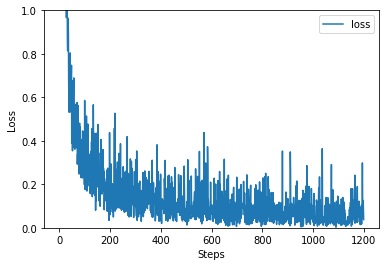

In [8]:
plt.plot(losses_his, label='loss')
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0, 1))
plt.show()

### Test

In [11]:
# !!!!!!!! Change in here !!!!!!!!! #
test_output = cnn(test_x[:10])
pred_y = torch.max(test_output, 1)[1].cuda().data.squeeze() # move the computation in GPU

print(pred_y, 'prediction number')
print(test_y[:10], 'real number')


 7
 2
 1
 0
 4
 1
 4
 9
 5
 9
[torch.cuda.LongTensor of size 10 (GPU 0)]
 prediction number

 7
 2
 1
 0
 4
 1
 4
 9
 5
 9
[torch.cuda.LongTensor of size 10 (GPU 0)]
 real number
